In [89]:
# import libraries
import json
import networkx as nx
import numpy as np
import os
import pandas as pd
import re
import random
import matplotlib.pyplot as plt
from networkx.algorithms import approximation as app
from scipy.stats import pearsonr
import seaborn as sns
import pylab
from scipy.stats import mannwhitneyu
import datetime
from sklearn.metrics import mean_absolute_error
from math import sqrt
import statsmodels.api as sm
from itertools import chain
import sys
import inspect

# access parent directory from notebooks directory
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

import newsrc.population as p
import newsrc.model as m
import newsrc.tuning as t


%load_ext autoreload
%autoreload 2
%matplotlib inline
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Tuning: nominated network

## 1. Grid search

In [67]:
tuning =  t.Tuning()

/Users/davidblok/Work EUR/GitHub/ABM-PA/newsrc/tuning.py:20: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.nominationPopulation = p.PeerNominatedDataPopulation('Peer-Nominated data population', self.input_args, 'yes')
<ipython-input-67-7e5a03539d76>:1: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  tuning =  t.Tuning()
/Users/davidblok/Work EUR/GitHub/ABM-PA/newsrc/tuning.py:21: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.communicationPopulation = p.CommunicationDataPopulation('Communication data population', self.input_args, 'no')


### 1.1. Running

In [68]:
# specify parameter space for grid search
seq = np.arange(0,1,0.05)
result_error, result_child, result_cl, empirical_data = tuning.execute_grid_search(t_range=seq,
                                                                                   i_range=seq,
                                                                                   t=700,
                                                                                   population_name='peer')

thres_PA: 0.0  I_PA: 0.0  error: 0.8669219510770382 |runtime: 6.8699119091033936
thres_PA: 0.0  I_PA: 0.05  error: 16.676614483073376 |runtime: 6.550983905792236
thres_PA: 0.0  I_PA: 0.1  error: 37.17701171616456 |runtime: 7.131543159484863
thres_PA: 0.0  I_PA: 0.15000000000000002  error: 65.5294011753803 |runtime: 6.882250070571899
thres_PA: 0.0  I_PA: 0.2  error: 39.39442326659281 |runtime: 7.3633880615234375
thres_PA: 0.0  I_PA: 0.25  error: 39.707084710935035 |runtime: 7.012650966644287
thres_PA: 0.0  I_PA: 0.30000000000000004  error: 40.02535551856443 |runtime: 6.510936975479126
thres_PA: 0.0  I_PA: 0.35000000000000003  error: 40.17689035039747 |runtime: 6.523878812789917
thres_PA: 0.0  I_PA: 0.4  error: 40.56975279202771 |runtime: 6.551936864852905
thres_PA: 0.0  I_PA: 0.45  error: 40.73915225042609 |runtime: 6.494236946105957
thres_PA: 0.0  I_PA: 0.5  error: 40.64635207902548 |runtime: 6.536460876464844
thres_PA: 0.0  I_PA: 0.55  error: 40.640826889466204 |runtime: 6.48407888412

### 1.2 Results

In [69]:
# SSE of all parameter combinations
errors_df = pd.DataFrame(result_error).pivot(index=0, columns=1,values=2)
errors_df

1,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
0,,,,,,,,,,,,,,,,,,,,
0.00,0.866922,16.676614,37.177012,65.529401,3.939442e+01,39.707085,4.002536e+01,4.017689e+01,4.056975e+01,4.073915e+01,4.064635e+01,4.064083e+01,4.054083e+01,41.164335,41.200345,41.422271,41.407933,41.711966,41.666128,41.744230
0.05,0.866922,593.943900,141.531177,38.501065,2.639574e+28,87425.627402,4.491120e+33,1.561751e+27,3.743596e+30,1.498020e+27,6.063590e+21,4.734919e+14,1.564630e+04,16.721009,17.774696,20.871261,21.949710,24.064136,26.510462,29.370333
0.10,0.866922,975.212967,818.990811,402.263210,2.999873e+02,150.177715,3.666525e+22,5.130279e+23,5.845325e+20,2.190632e+28,7.289661e+22,3.020745e+15,3.861302e+04,3.628888,5.762712,6.831636,9.809106,12.353367,15.956189,24.181188
0.15,0.866922,2.468372,1575.415393,840.917284,5.349612e+02,541.785217,7.960406e+16,9.216831e+33,1.355854e+30,4.696228e+29,7.778094e+22,1.665375e+16,3.350777e+05,3.496933,3.074126,2.575532,3.629831,5.095759,7.551168,17.609796
0.20,0.866922,2.141913,535.828140,1481.593539,1.112379e+03,1016.075419,7.052622e+02,3.895603e+02,1.016821e+32,3.013747e+17,1.763566e+24,7.561414e+15,1.978655e+05,17.979488,9.206866,8.005258,6.102326,2.884239,4.858183,13.305923
0.25,0.866922,2.127163,2.910242,1598.149764,1.497637e+03,1276.104157,1.026687e+03,9.685917e+33,3.737109e+23,2.445295e+27,9.524069e+14,3.997701e+15,3.629955e+05,44.126749,31.904636,15.412405,12.960885,10.261881,6.627835,11.827278
0.30,0.866922,2.049362,2.876855,732.872636,1.701255e+03,1289.686752,1.348067e+03,1.363531e+34,2.111329e+23,4.680216e+25,1.042600e+13,2.644473e+16,6.331883e+05,98.585918,59.032705,33.350076,27.423645,13.765830,14.203851,9.788508
0.35,0.866922,1.895644,2.248553,3.187561,1.642384e+03,1753.165081,1.628851e+03,9.663280e+33,8.803902e+23,1.968921e+26,1.556558e+12,7.437334e+11,1.929777e+06,135.403309,113.787150,74.283605,43.408584,24.759851,20.270612,7.774777
0.40,0.866922,1.810518,2.337584,2.875189,1.426324e+03,1603.865124,3.038048e+03,1.586590e+34,6.913792e+06,1.445610e+04,1.295218e+15,1.114630e+16,5.301242e+05,194.107820,125.388523,125.727080,77.032528,63.785043,36.966429,15.141680


Text(0.5, 105.0, 'I PA')

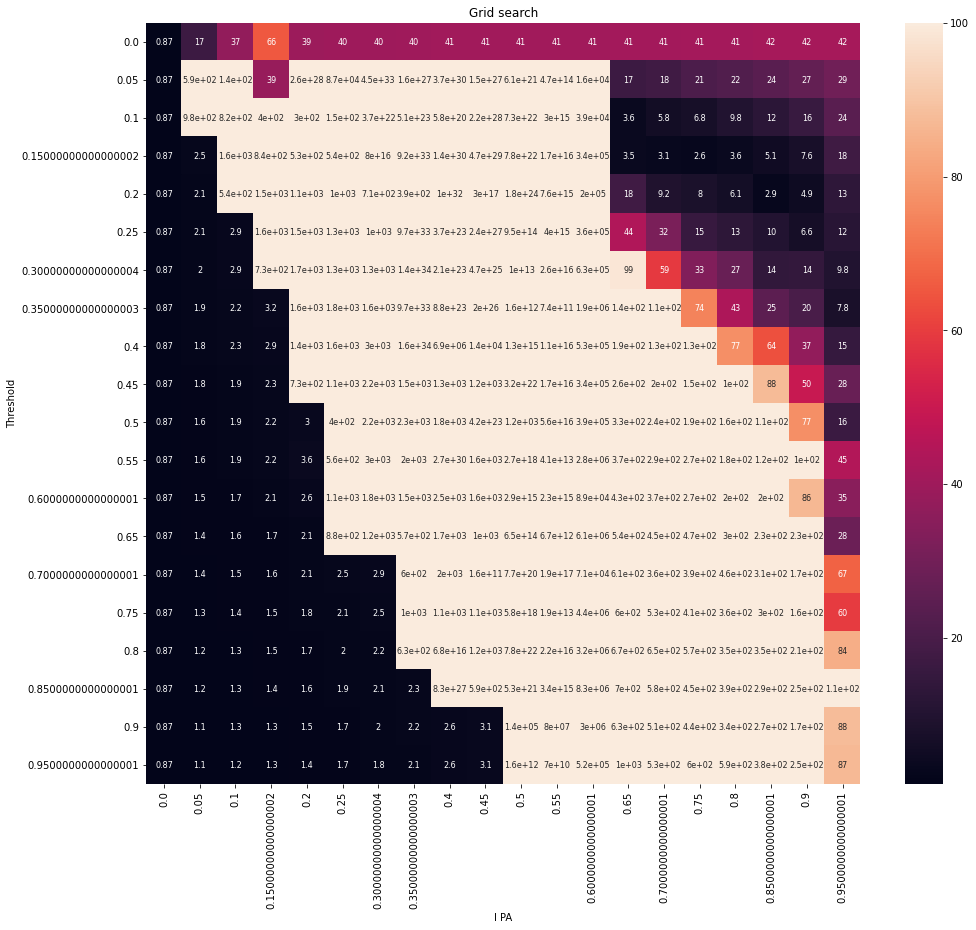

In [71]:
# plot heatmap of grid search
plt.figure(figsize=((16,14)))
plt.title('Grid search')
sns.heatmap(errors_df, annot=True, annot_kws={"size": 8}, vmin=1, vmax=100)
plt.ylabel('Threshold')
plt.xlabel('I PA')

## 1. Grid search #2

### 1.1. Running

In [104]:
# specify parameter space for grid search
t_seq = np.arange(0,1,0.05)
# i_seq < 0.1
random.seed(4321)
i_seq = []
for i in range(10):
    i_seq.append(random.uniform(0,0.05))

i_seq.sort()

In [106]:
result_error, result_child, result_cl, empirical_data = tuning.execute_grid_search(t_range=t_seq,
                                                                                   i_range=i_seq,
                                                                                   t=700,
                                                                                   population_name='peer')

thres_PA: 0.0  I_PA: 0.002119993736680881  error: 3.5654152373988444 |runtime: 6.979688405990601
thres_PA: 0.0  I_PA: 0.0026513120109206536  error: 3.8821711001432755 |runtime: 6.826192140579224
thres_PA: 0.0  I_PA: 0.0031768649610261937  error: 4.083484699610207 |runtime: 7.2200329303741455
thres_PA: 0.0  I_PA: 0.008847961441091502  error: 4.31627157420666 |runtime: 6.701159954071045
thres_PA: 0.0  I_PA: 0.009295070389855182  error: 4.269739462794636 |runtime: 6.457628965377808
thres_PA: 0.0  I_PA: 0.012714048123289929  error: 4.393947118322368 |runtime: 6.78387975692749
thres_PA: 0.0  I_PA: 0.014539855499095374  error: 4.501092975745359 |runtime: 6.835134029388428
thres_PA: 0.0  I_PA: 0.018271371019437672  error: 6.405382021946201 |runtime: 7.73115611076355
thres_PA: 0.0  I_PA: 0.020375889464703714  error: 5.135408471333783 |runtime: 7.413147926330566
thres_PA: 0.0  I_PA: 0.04525909672468739  error: 14.1579735360696 |runtime: 6.710791826248169
thres_PA: 0.05  I_PA: 0.0021199937366808

### 1.2 Results

In [107]:
# SSE of all parameter combinations
errors_df = pd.DataFrame(result_error).pivot(index=0, columns=1,values=2)
errors_df

1,0.002120,0.002651,0.003177,0.008848,0.009295,0.012714,0.014540,0.018271,0.020376,0.045259
0,,,,,,,,,,
0.00,3.565415,3.882171,4.083485,4.316272,4.269739,4.393947,4.501093,6.405382,5.135408,14.157974
0.05,1.157391,1.137602,1.142815,1.168568,1.170687,1.196727,1.224901,1.344529,1.326124,985.661571
0.10,1.618263,1.603689,1.611907,1.662914,1.664534,1.699423,1.706281,1.751019,1.758360,652.213275
0.15,1.737740,1.738501,1.746029,1.791909,1.800541,1.819266,1.825394,1.891842,1.892097,2.210983
0.20,1.768345,1.769960,1.776122,1.816656,1.799665,1.855360,1.840054,1.867043,1.875531,2.120316
0.25,1.725797,1.726871,1.729638,1.772002,1.766515,1.799649,1.805242,1.854727,1.843609,2.117593
0.30,1.681409,1.680792,1.682446,1.711909,1.716668,1.746244,1.740255,1.771018,1.787578,1.980236
0.35,1.647050,1.646210,1.647128,1.673577,1.682917,1.689638,1.700391,1.706924,1.728663,1.821167
0.40,1.607846,1.602283,1.604098,1.625583,1.631674,1.646781,1.647101,1.663696,1.691135,1.818718


Text(0.5, 105.0, 'I PA')

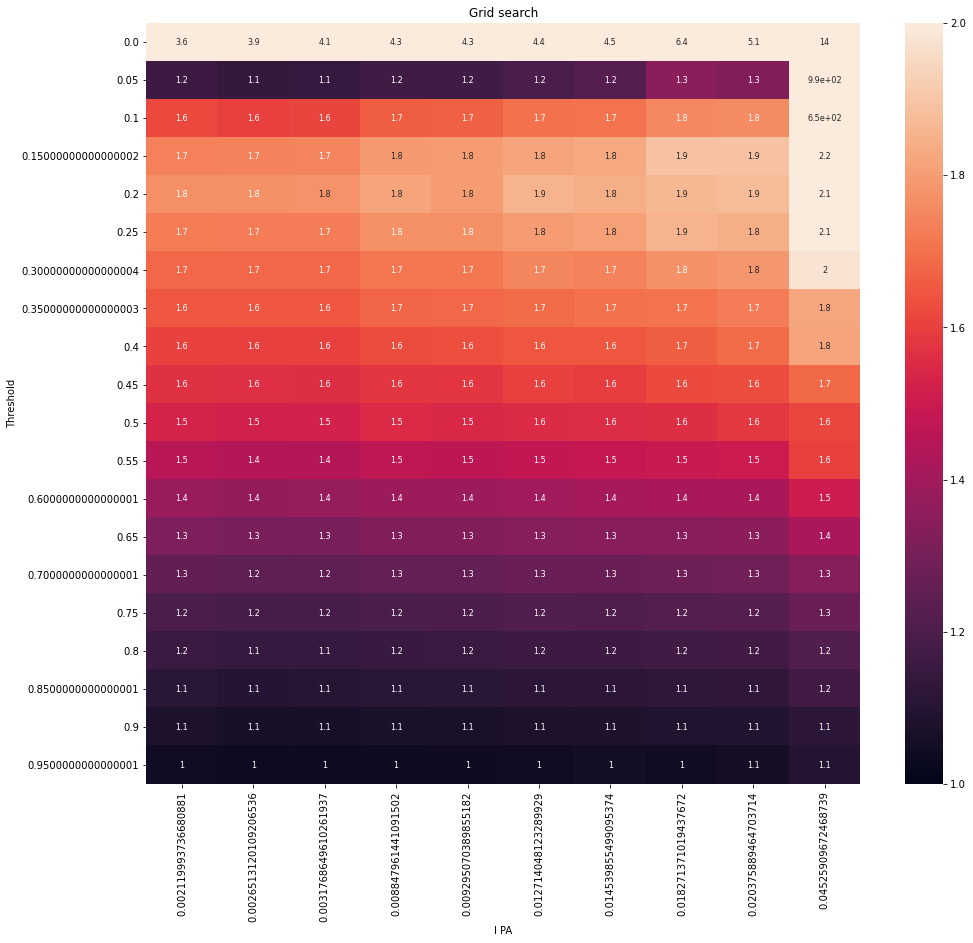

In [111]:
# plot heatmap of grid search
plt.figure(figsize=((16,14)))
plt.title('Grid search')
sns.heatmap(errors_df, annot=True, annot_kws={"size": 8}, vmin=1, vmax=2)
plt.ylabel('Threshold')
plt.xlabel('I PA')

0      1.403081
1      1.402799
2      1.402524
3      1.402258
4      1.401983
         ...   
695    1.505099
696    1.505099
697    1.505099
698    1.505099
699    1.505099
Length: 700, dtype: float64

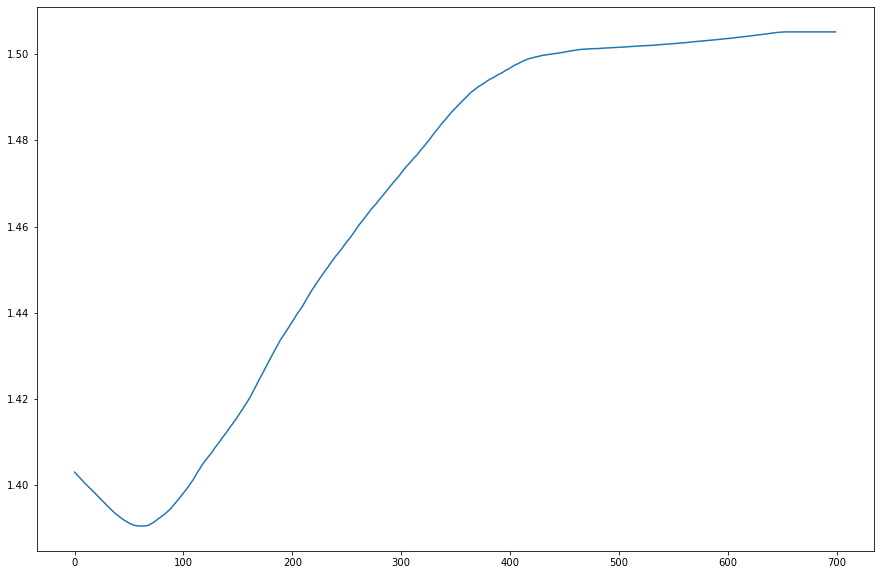

In [112]:
a = pd.DataFrame(result_cl[11]).mean(axis=1)

a.plot(figsize=((15,10)))
a









## 2. Simulated Annealing

### 2.1 Run simulation

In [146]:
parameters, error_hist, parameters_hist = tuning.execute_simulated_annealing(initial_parameters=[0.95,0.002],
                                                                             t=700,
                                                                             population_name="peer")


thres_PA:  0.95  I_PA:  0.002 |runtime:  6.314460039138794

Temp:  1.0
1.0 1 thres_PA:  0.9372255388569629  I_PA:  1e-05 cost:  0.8684554679146163 |runtime:  6.2622740268707275
1.0 2 thres_PA:  0.9283045216648931  I_PA:  1e-05 cost:  0.8683018379336767 |runtime:  6.1834938526153564
1.0 3 thres_PA:  0.9170166257378656  I_PA:  1e-05 cost:  0.8682357192574969 |runtime:  6.298654794692993
1.0 4 thres_PA:  0.8217878652104169  I_PA:  0.004802063202221626 cost:  1.1266037910329365 |runtime:  6.290568828582764
1.0 5 thres_PA:  0.896229416975042  I_PA:  0.004592400127850049 cost:  1.0681958889262861 |runtime:  6.314253091812134
1.0 6 thres_PA:  0.8409627812858312  I_PA:  0.003662741789541007 cost:  1.108311576252064 |runtime:  6.3615851402282715
1.0 7 thres_PA:  0.8058012484841037  I_PA:  0.0009181534861754576 cost:  1.1181293549586484 |runtime:  6.34532904624939
1.0 8 thres_PA:  0.8021362336756596  I_PA:  1e-05 cost:  0.8688926882738313 |runtime:  6.298157215118408
1.0 9 thres_PA:  0.770249617

### 2.2 Resutls

In [147]:
min(error_hist)

0.8651926829924028

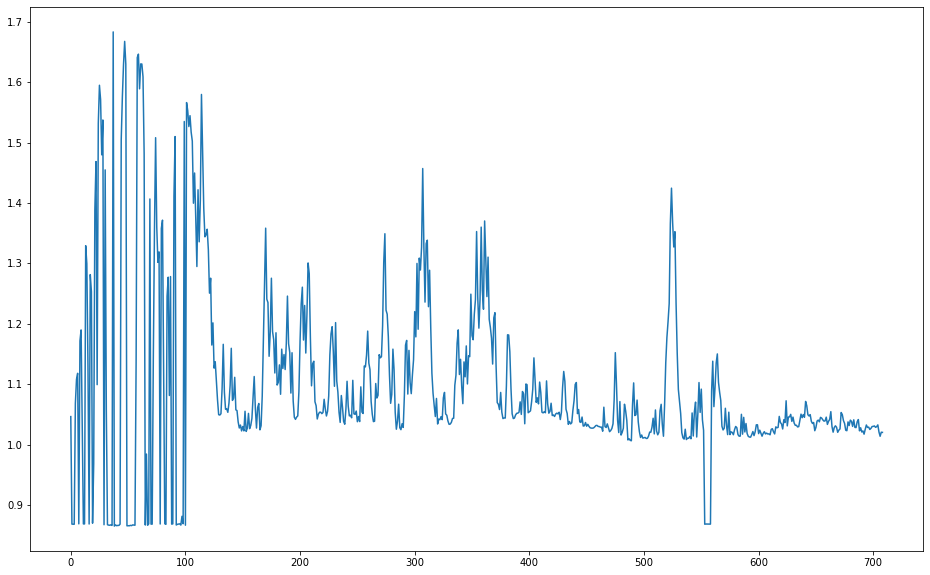

In [148]:
plt.figure(figsize=((16,10)))
plt.plot(error_hist)

In [149]:
thres_h_all = np.asarray([p_all[0] for p_all in parameters_hist])
ipa_h_all = np.asarray([p_all[1] for p_all in parameters_hist])
cost_h_all = np.asarray(error_hist)

Text(0, 0.5, 'I PA')

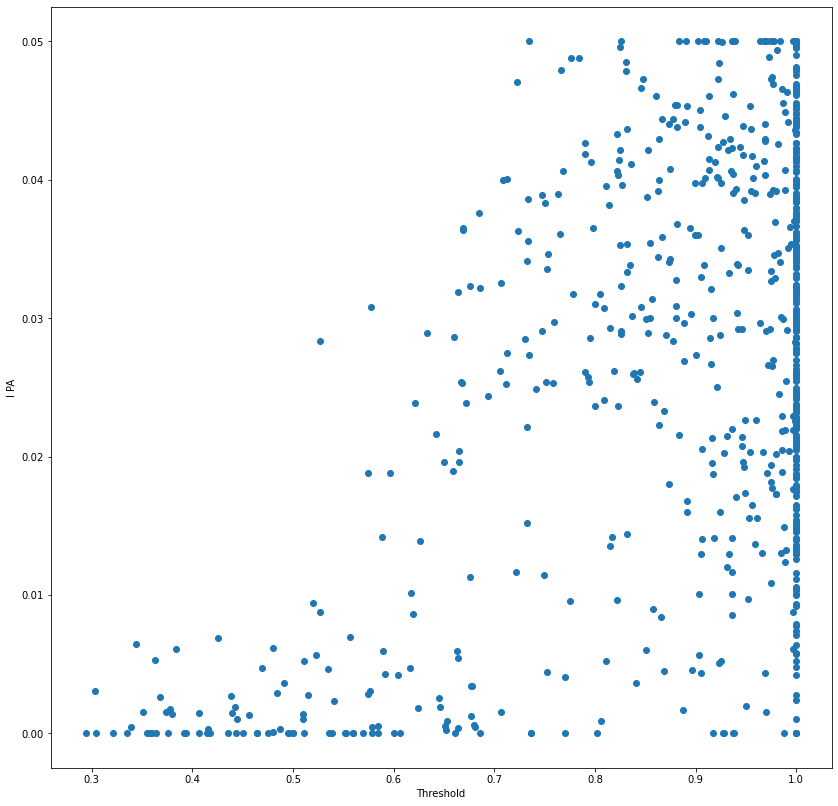

In [151]:
plt.figure(figsize=((14,14)))
plt.scatter(thres_h_all, ipa_h_all)
plt.xlabel('Threshold')
plt.ylabel('I PA')


Text(0.5, 0, 'I PA')

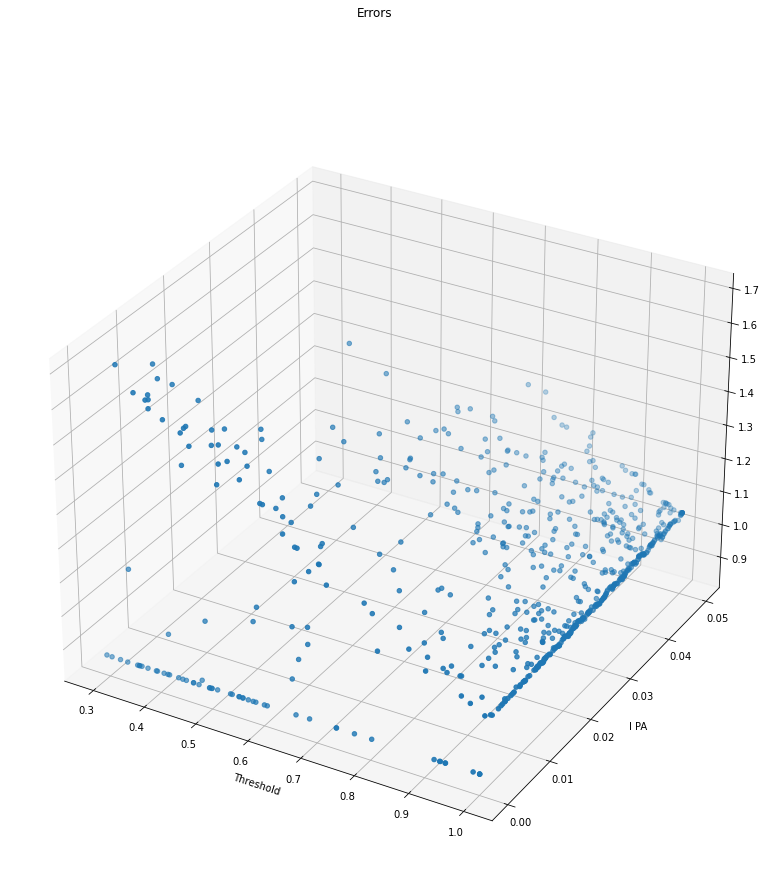

In [152]:
fig = plt.figure(figsize=((14,14)))

fig.suptitle('Errors')

cm = plt.get_cmap("RdYlGn")

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(thres_h_all, ipa_h_all, cost_h_all)
plt.xlabel('Threshold')
plt.ylabel('I PA')

### 2.3 Optimal parameter combinations

In [153]:
opt_par = [0.9999, 0.021257074954624332]

opt_error, opt_child, opt_cl, empirical_data = tuning.execute(thres=opt_par[0],
                                                              ipa=opt_par[1],
                                                              t=700,
                                                              population_name='peer')

thres_PA: 0.9999  I_PA: 0.021257074954624332  error: 1.0203103788425287 |runtime: 6.481667995452881


<AxesSubplot:>

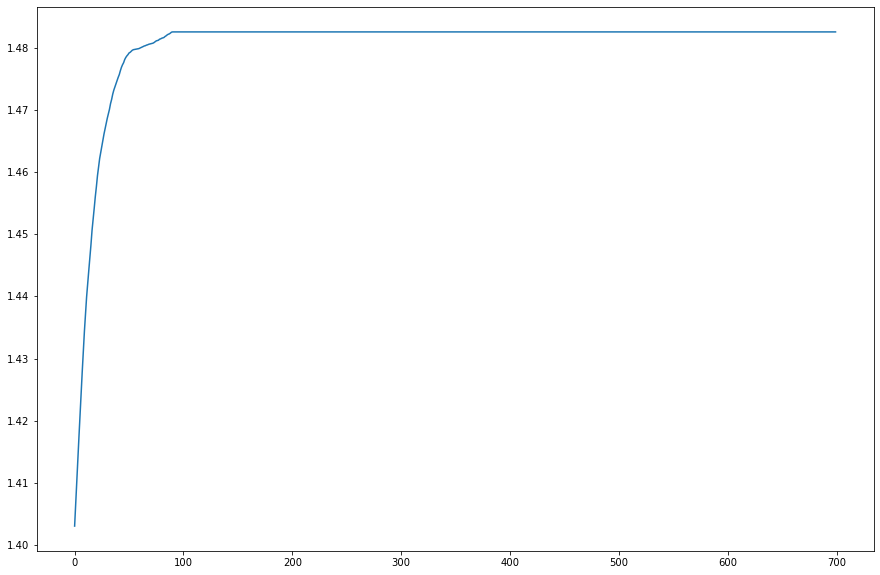

In [154]:
a = pd.DataFrame(opt_cl).mean(axis=1)

a.plot(figsize=((15,10)))








In [156]:
parameters2, error_hist2, parameters_hist2 = tuning.execute_simulated_annealing(initial_parameters=[0.05,0.002],
                                                                             t=700,
                                                                             population_name="peer")

thres_PA:  0.05  I_PA:  0.002 |runtime:  5.892575979232788

Temp:  1.0
1.0 1 thres_PA:  1e-05  I_PA:  1e-05 cost:  0.8672522069804611 |runtime:  5.824759006500244
1.0 2 thres_PA:  1e-05  I_PA:  0.00125159631833757 cost:  2.9636836621267912 |runtime:  5.760337829589844
1.0 3 thres_PA:  0.008540109165895541  I_PA:  1e-05 cost:  0.8675229891196938 |runtime:  5.809580087661743
1.0 4 thres_PA:  1e-05  I_PA:  1e-05 cost:  0.8672522069804611 |runtime:  5.748847007751465
1.0 5 thres_PA:  1e-05  I_PA:  1e-05 cost:  0.8672522069804611 |runtime:  5.616199254989624
1.0 6 thres_PA:  0.08001335768269201  I_PA:  1e-05 cost:  0.8675549360659721 |runtime:  5.689663887023926
1.0 7 thres_PA:  0.14654627881740684  I_PA:  1e-05 cost:  0.8685748220140665 |runtime:  5.612206220626831
1.0 8 thres_PA:  0.13146713360733875  I_PA:  0.0049698715891723115 cost:  1.7340219545717275 |runtime:  5.68139386177063
1.0 9 thres_PA:  0.18025489343447954  I_PA:  0.0009731755095857583 cost:  1.5162970378325875 |runtime:  5.6

In [157]:
parameters2

[0.8337109111787651, 1e-05]

In [158]:
opt_par = parameters2

opt_error, opt_child, opt_cl, empirical_data = tuning.execute(thres=opt_par[0],
                                                              ipa=opt_par[1],
                                                              t=700,
                                                              population_name='peer')

thres_PA: 0.8337109111787651  I_PA: 1e-05  error: 0.8687776327509148 |runtime: 6.266630172729492


<AxesSubplot:>

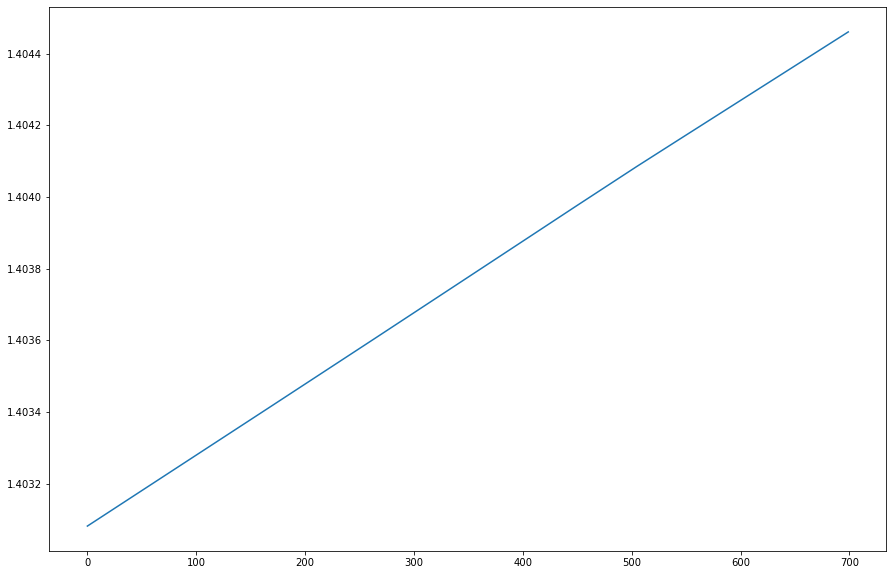

In [159]:
a = pd.DataFrame(opt_cl).mean(axis=1)

a.plot(figsize=((15,10)))
